In [1]:
from __future__ import print_function
import numpy as np
#import torch
#import torch.autograd as ag

In [ ]:
import urllib
import scipy.optimize
import random
from collections import defaultdict
import string
from sklearn.metrics import accuracy_score ,confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, InputLayer, Flatten, Reshape
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
import tensorflow as tf
import os
from matplotlib import pyplot
import tools
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)


### Load data

In [4]:
xtrain,ltrain = tools.load(dataset = "training", path = "./FashionMNIST")
xtest, ltest  = tools.load(dataset = "testing",  path = "./FashionMNIST")

### Normalize 

In [5]:
def normalize_MNIST_images(x):
    x = x.astype('float64')
    x = x*((2.0/255))-1
    return x

def label2onehot(lbl):
    d = np.zeros((lbl.max() + 1, lbl.size))
    d[lbl, np.arange(0, lbl.size)] = 1
    return d

In [7]:
xtrain = normalize_MNIST_images(xtrain)
xtest = normalize_MNIST_images(xtest)

In [8]:
dtrain = label2onehot(ltrain)
dtest = label2onehot(ltest)

In [9]:
xtrain=xtrain.reshape(28, 28, 1, 60000)
xtest=xtest.reshape(28, 28, 1, 10000)

In [10]:
print (xtrain.shape)
print (xtest.shape)

(28, 28, 1, 60000)
(28, 28, 1, 10000)


In [12]:
xtrain = np.moveaxis(xtrain, [3] ,[0])
xtest = np.moveaxis(xtest, [3] ,[0])

In [14]:
model = Sequential()

model.add(InputLayer(input_shape=( 28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), input_shape = ( 60000, 28, 28, 1), activation = 'relu',bias_initializer='RandomNormal', kernel_initializer='random_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(512, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 512)         819712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 512)         0         
__________

In [15]:
from keras.optimizers import Adam
opt = Adam(decay=0.001)

In [16]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
import time
start_time = time.time()
epochs=20
batch_size=64
training = model.fit(xtrain, dtrain.T,
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1, validation_split=0.2)
training_time = time.time() - start_time

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 234us/step - loss: 0.7517 - acc: 0.7375 - val_loss: 0.3770 - val_acc: 0.8722
Epoch 2/20
48000/48000 [==============================] - 9s 187us/step - loss: 0.4512 - acc: 0.8417 - val_loss: 0.3123 - val_acc: 0.8876
Epoch 3/20
48000/48000 [==============================] - 9s 188us/step - loss: 0.3748 - acc: 0.8700 - val_loss: 0.2761 - val_acc: 0.9025
Epoch 4/20
48000/48000 [==============================] - 9s 183us/step - loss: 0.3198 - acc: 0.8879 - val_loss: 0.2659 - val_acc: 0.9062
Epoch 5/20
48000/48000 [==============================] - 9s 183us/step - loss: 0.2865 - acc: 0.8982 - val_loss: 0.2655 - val_acc: 0.9084
Epoch 6/20
48000/48000 [==============================] - 9s 184us/step - loss: 0.2547 - acc: 0.9101 - val_loss: 0.2377 - val_acc: 0.9159
Epoch 7/20
48000/48000 [==============================] - 9s 185us/step - loss: 0.2263 - acc: 0.9195 - val_loss: 0.2427 -

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,6)

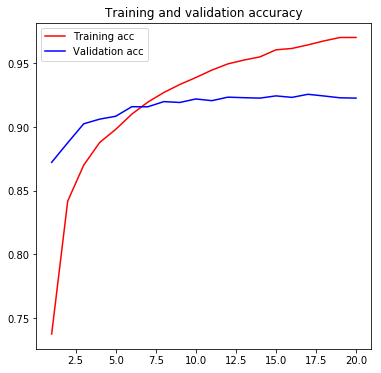

In [22]:
acc = training.history['acc'][0:20]
val_acc = training.history['val_acc'][0:20]
loss = training.history['loss'][0:20]
val_loss = training.history['val_loss'][0:20]
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.show()

#### Test data

In [72]:
model.evaluate(xtest, dtest.T)

10000/10000 [==============================] - 2s 185us/step


[0.30254612206202003, 0.9279]